# Sampling quantum states
Sampling single mode quantum states for use in quantum phase space simulations using the truncated Wigner and +P distributions. Similar methods can be applied to multimode simulations of Bose-Einstein condensates.

We use the methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033)

with erratum [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

A complete erratum can be found at [SciPost](https://scipost.org/commentaries/10.1016/j.optcom.2009.06.033/).

We add sampling for the additional distributions:
- fock state for +W
- thermal state for +P


For more information on Bose-Einstein condensate applications, see the review 

___Dynamics and statistical mechanics of ultra-cold Bose gases using c-field techniques___, P. B. Blakie, A. S. Bradley, M. J. Davis, R. J. Ballagh, and C. W. Gardiner, [Advances in Phyiscs 57, 363 (2008)](http://dx.doi.org/10.1080/00018730802564254)



In [1]:
using PhaseSpaceTools, Plots, LaTeXStrings
gr(size=(250,250),xlabel=L"\alpha_r",ylabel=L"\alpha_i",
    xlims=(-20,20),ylims=(-20,20),ms=.2,
    legend=false,grid=false,aspect_ratio=1,colorbar=true)

┌ Info: Recompiling stale cache file /Users/abradley/.julia/compiled/v1.1/PhaseSpaceTools/hvSNh.ji for PhaseSpaceTools [0e21426a-da0a-11e8-1f13-43a2532b2fa8]
└ @ Base loading.jl:1184
┌ Warning: Implicit vectorized function is deprecated in favor of compact broadcast syntax.
│   caller = include at boot.jl:326 [inlined]
└ @ Core ./boot.jl:326
┌ Warning: Implicit vectorized function is deprecated in favor of compact broadcast syntax.
│   caller = include at boot.jl:326 [inlined]
└ @ Core ./boot.jl:326
┌ Warning: Implicit vectorized function is deprecated in favor of compact broadcast syntax.
│   caller = eval(::Module, ::Any) at boot.jl:328
└ @ Core ./boot.jl:328


Plots.GRBackend()

In [2]:
function showmeansW(a,ā)
    n̄ = mean(a.*ā)-.5
    Vn= mean(a.^2 .*ā.^2)-mean(a.*ā)-n̄.^2
    println(" ")
    println("N = $N samples.")
    println(" ")
    println("Averages")
    println("<â> = ", mean(a))
    println("<â⁺â> = ",n̄)
    println("V(n̂) = ",Vn)
    println("Relative number variance = ",sqrt(abs(Vn))/abs(n̄))
end

showmeansW (generic function with 1 method)

In [3]:
?wigner

search: wigner



```
a,ā = wigner(state <: State,N)
```

Generate `N` samples from wigner phase-space distribution for `state`.

Implemented states are

  * `Coherent(α)`
  * `Thermal(α,n̄)`
  * `Squeezed(α,ϵ)`
  * `Crescent(α,ϵ,q)`
  * `Fock(n)`
  * `Bogoliubov(u,v,n̄)`

Moments of the Wigner distribution generate quantum operator averages that are symmetrically ordered.


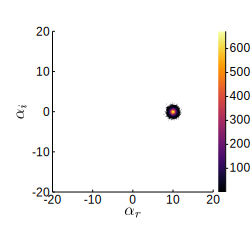

In [4]:
b = 10
N = 100000
state = Coherent(b)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [5]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = 10.001477984102957 + 0.0024845570929332857im
<â⁺â> = 100.03039061924156 + 0.0im
V(n̂) = 99.83673592188461 + 0.0im
Relative number variance = 0.09988797803969245


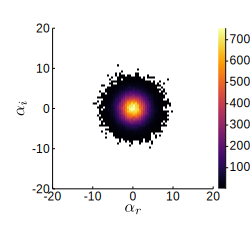

In [6]:
b = 10
N = 100000
state = Thermal(0,b)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [7]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = 0.015350309480673442 + 0.0015321103804663869im
<â⁺â> = 9.989438525321486 + 0.0im
V(n̂) = 109.55714382580996 + 0.0im
Relative number variance = 1.047802118525014


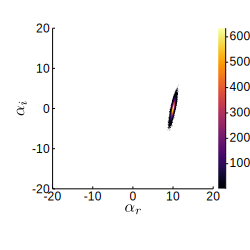

In [8]:
β = 10
ϕ = π/16
r = 1
ϵ = r*exp(2*im*ϕ)
N = 100000
state = Squeezed(β,ϵ)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [9]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = 10.000940667461373 + 0.0015350487822993182im
<â⁺â> = 101.41724465590346 + 0.0im
V(n̂) = 48.08110938135542 + 0.0im
Relative number variance = 0.06837155109543987


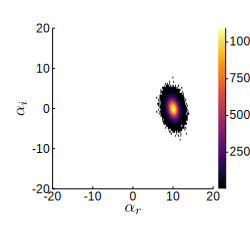

In [10]:
β = 10
ϕ = π/16
r = 1
ϵ = r*exp(2*im*ϕ)
N = 100000
state = Squeezed(β,ϵ)
a,ā = positiveP(state,N)
histogram2d(real(a),imag(a))

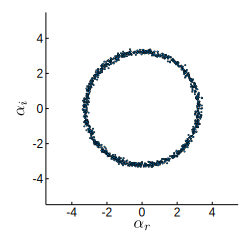

In [11]:
n = 10
N = 1000
state = Fock(n)
a,ā = wigner(state,N)
scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [12]:
N=10000
a,ā = wigner(state,N)
showmeansW(a,ā)

 
N = 10000 samples.
 
Averages
<â> = -0.009026670917641545 - 0.01374884229035331im
<â⁺â> = 9.999054463847164 + 0.0im
V(n̂) = 0.00292012676229092 + 0.0im
Relative number variance = 0.005404330724249673


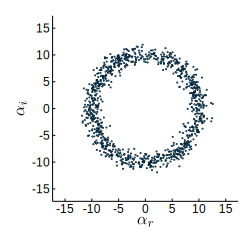

In [13]:
n = 100
N = 1000
state = Fock(n)
a,ā = positiveP(state,N)
 
scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [14]:
N = 10000;
a,ā = positiveP(state,N)

(Complex{Float64}[-10.3681-1.55557im, 8.89674+1.57005im, -10.1528-0.476195im, -4.5657+8.63339im, -4.22355-10.1922im, -9.56196+1.81097im, 9.4263-1.16085im, 8.13608-8.05452im, 8.52932+2.49974im, -6.5854+5.67584im  …  -8.31147+7.23289im, 0.0650267+10.5886im, -10.1578+3.04897im, -5.95489-8.40746im, -10.3356+4.61447im, 9.81283+4.43823im, 1.92206+10.4182im, 6.69557-7.49448im, -10.0769+5.76008im, -4.73536-7.77681im], Complex{Float64}[-9.08648+1.99762im, 9.42372-0.309952im, -9.51672-1.61119im, -4.68753-7.59762im, -4.8013+9.20099im, -10.411+0.167976im, 9.17532-1.17277im, 3.76015+10.0182im, 11.1975-1.13358im, -9.58522-4.57163im  …  -5.25801-8.34479im, 1.29226-10.225im, -9.89727+0.276161im, -6.78244+7.4087im, -8.78966-3.89078im, 7.66107-5.5406im, -0.0153342-10.9913im, 4.09078+8.34627im, -6.49254-4.37233im, -5.1149+8.81267im])

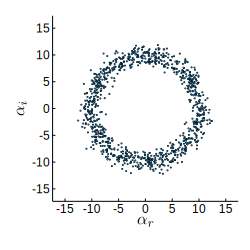

In [15]:
n = 100
N = 1000
a,ā = positiveW(state,N)

scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [16]:
N = 100000;
a,ā = positiveP(state,N)
# showmeansP(a,ā)

(Complex{Float64}[6.86239-7.92721im, 1.08605-10.8469im, 7.01817-9.24568im, 10.3499+4.60586im, -1.26312-11.2113im, 9.05675-2.80928im, 5.04059+7.00852im, -9.35335-4.78029im, 6.7888-8.10526im, 5.01453-7.71673im  …  -10.1056-2.66365im, -4.96845-9.98041im, 1.72775+10.1202im, -9.14033-4.74394im, -2.35463-10.8031im, 7.75168+6.34238im, 4.61767+9.06603im, -5.02521-8.43406im, -3.78769+9.85514im, 4.99919-8.6725im], Complex{Float64}[8.39555+7.00088im, -0.0919227+9.1997im, 6.44437+8.37887im, 9.45926-1.7445im, -1.59469+9.61445im, 10.8304+0.325662im, 7.58708-7.82539im, -9.42145+3.40877im, 7.26727+7.31042im, 4.17086+10.547im  …  -10.4868+3.37918im, -4.1462+7.79777im, 2.46461-9.60339im, -9.86736+3.53031im, -1.11718+9.39266im, 7.7594-6.48806im, 6.68423-8.83576im, -6.93309+6.38068im, -3.55048-9.36934im, 4.42668+8.38609im])

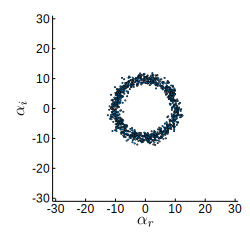

In [17]:
#for n>320 uses asymptotic expansion
n=321
state = Fock(n)
N=1000
a,ā = positiveW(state,N)
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [18]:
N = 100000;
a,ā = positiveP(state,N)
# showmeansP(n,N,a,ā)

(Complex{Float64}[11.535-13.2577im, 3.22529-18.5557im, -0.960542+17.6947im, 18.8859+0.400849im, 18.6174-6.06732im, 6.17977+15.0041im, -17.2568+6.13399im, 6.08775-16.6477im, -8.742-15.8545im, 13.9556+11.9166im  …  13.7227+13.3948im, -1.38478-17.8341im, -16.4617+6.3973im, -10.0685-15.8162im, -4.90621-18.4162im, -5.80205-17.1577im, -6.01541+17.84im, -8.82766+14.6355im, -12.625-14.1583im, 2.58985+19.3914im], Complex{Float64}[12.0799+14.0091im, 1.13088+17.5032im, -0.487079-18.9104im, 17.2385-0.134684im, 16.3582+5.08773im, 7.28524-17.7536im, -16.8126-2.82845im, 7.9496+16.6765im, -6.17057+17.0651im, 14.7386-10.2485im  …  13.0721-13.0755im, -0.30073+16.6185im, -16.6972-6.33057im, -7.20529+16.2413im, -5.3967+16.7924im, -4.2462+18.1082im, -5.01113-16.7389im, -9.28819-15.6786im, -10.3584+15.8535im, 4.2679-17.1216im])

In [19]:
#push n and N
n=10000
state = Fock(n)
N=100000
a,ā = positiveW(state,N)
# averages(n,N,a,ā)

(Complex{Float64}[87.4477+48.9251im, -91.6299+37.3922im, 92.9162-33.4826im, 84.4926-53.3364im, -94.833-31.3523im, -87.7675-46.5701im, -94.0769-38.3329im, 68.1202-72.5451im, 70.0343-71.5026im, 87.102-47.1809im  …  -89.9562+39.5939im, -58.5139+78.7855im, 99.2571+5.34252im, 87.4858-49.7748im, -87.9356+48.9558im, -94.9015+35.6351im, 15.103+99.2875im, -11.3342-97.9044im, -5.10481-99.173im, -91.6279+41.6616im], Complex{Float64}[86.256-51.1971im, -93.0515-39.5393im, 94.4264+33.2773im, 84.1099+53.3749im, -94.5023+30.0436im, -86.7389+47.601im, -92.8318+39.8046im, 66.6341+73.0931im, 68.9484+73.4454im, 88.1403+47.2314im  …  -90.8843-40.1317im, -59.101-80.4373im, 100.119-4.53843im, 87.8089+50.1521im, -87.7083-48.1933im, -93.6746-35.3561im, 17.4544-100.067im, -9.63129+98.8744im, -5.06553+100.775im, -89.9671-42.8457im])

In [20]:
methods(Crescent)

# 2 methods for generic function "(::Type)":
[1] Crescent(β::Complex{Float64}, ϵ::Complex{Float64}, q::Float64) in PhaseSpaceTools at /Users/abradley/.julia/dev/PhaseSpaceTools/src/types.jl:12
[2] Crescent(β, ϵ, q) in PhaseSpaceTools at /Users/abradley/.julia/dev/PhaseSpaceTools/src/types.jl:12

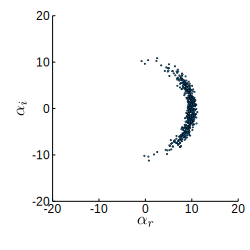

In [21]:
β = 10
ϵ = 0
q = .5
N = 500
state = Crescent(β,ϵ,q)
a,ā = wigner(state,N)
scatter(real(a),imag(a))

not quite the right moments for crescent state, but a sanity check of sorts:

In [22]:
mean(a.*ā)-.5, sinh(abs(ϵ)).^2+abs2(β)

(100.1940963628722 + 0.0im, 100.0)

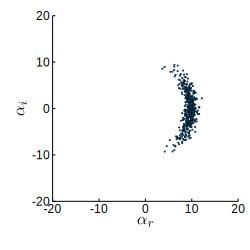

In [23]:
β = 10
ϵ = 0
q = .4
N = 500
state = Crescent(β,ϵ,q)
a,ā = husimiQ(state,N)
scatter(real(a),imag(a))

In [24]:
mean(a.*ā)-1,sinh(abs(ϵ)).^2+abs2(β) 

(98.80997327784645 + 0.0im, 100.0)

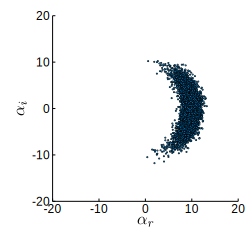

In [25]:
β = 10
ϵ = 0
q = .4
N = 5000
state = Crescent(β,ϵ,q)
a,ā = positiveP(state,N)
scatter(real(a),imag(a))

In [26]:
mean(a.*ā),sinh(abs(ϵ)).^2+abs2(β)

(100.04272311082948 + 0.08734302164454im, 100.0)